# **Finance Pairs Formation**

# **Import libraries and dataset**

In [33]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
import statistics as stats
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import itertools
from heapq import nsmallest, nlargest
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(20,14)})

In [34]:
import sys
# locate the folder which stores the custom package using relative path
sys.path.append('../../../../../src')

import config_snippets as config_snp
import splitting_data as splitting_data
import gatev_distance_method as gatev_dist
import data_transformation_snippets as data_transform_snp
import time_series_analysis_snippets as tsa_snp
import engle_granger_cointegration_method as eg_coint
import johansen_cointegration_method as jj_coint 
import handling_dataframe as hdf
import handling_datetime as hdt


In [35]:
# Path to your config YAML file
config_file_path = "..//..//../config.yaml"

# Load the configuration
config = config_snp.load_config(config_file_path)

if config is not None:
    import ast
    # Access and use the parameters
    split_ratio = config.get("split_ratio")
    
    # # Access and convert string to tuple
    # train_period = ast.literal_eval(config.get("train_period"))
    # test_period = ast.literal_eval(config.get("test_period"))
    
    # Get list of df_consumer_good data paths
    lst_df_consumer_good_paths = ast.literal_eval(config.get("paths_df_consumer_good_processed"))
    

In [36]:
# Import data 
path = lst_df_consumer_good_paths[0]
df = pd.read_csv(path)

In [37]:
# Set date as index
df.set_index("date", inplace=True)

In [38]:
df = df.dropna()

# **Split data**

In [39]:
# Example: split ratio = 0.7
df_train, df_test = splitting_data.splitting_data_by_ratio(
    df,
    split_ratio=split_ratio
)

In [40]:
# Example of splitting by specified period

# test_train, test_test = splitting_data_by_date(
#     df,
#     train_period = train_period,
#     test_period = test_period
# )

# **Gatev Distance Approach**

In [41]:
df_train

,adClose_DBC,adClose_DLG,adClose_HHS,adClose_HNG,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
date,,,,,,,,,,
2018-06-11,6.556,2.753,2.982,8.59,8.201,11.745,5.465,1.780,3.94,99.810
2018-06-12,6.681,2.753,2.922,8.54,8.138,11.225,5.422,1.753,3.99,100.309
2018-06-13,6.493,2.753,2.945,8.62,8.233,11.002,5.465,1.780,3.92,100.309
2018-06-14,6.681,2.715,2.959,9.10,8.327,11.149,5.509,1.735,3.95,99.755
2018-06-15,6.619,2.715,2.973,9.15,8.391,10.852,5.465,1.744,3.92,99.755
...,...,...,...,...,...,...,...,...,...,...
2019-07-25,8.139,1.560,2.391,18.15,5.390,13.454,12.601,1.573,3.12,85.965
2019-07-26,7.710,1.560,2.405,17.90,5.367,13.371,12.601,1.663,3.12,85.552
2019-07-27,7.710,1.560,2.405,17.90,5.367,13.371,12.601,1.663,3.12,85.552


## **Gatev Data Normalization**

In [42]:
df_cum_daily_returns_train = gatev_dist.gatev_data_normalize(df_train)

In [43]:
df_cum_daily_returns_train

,adClose_DBC,adClose_DLG,adClose_HHS,adClose_HNG,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
date,,,,,,,,,,
2018-06-12,1.906650,0.000000,-2.012072,-0.582072,-0.768199,-4.427416,-0.786825,-1.516854,1.269036,0.499950
2018-06-13,-0.960952,0.000000,-1.240778,0.349243,0.390196,-6.326096,0.000000,0.000000,-0.507614,0.499950
2018-06-14,1.906650,-1.380312,-0.771294,5.937136,1.536398,-5.074500,0.805124,-2.528090,0.253807,-0.055105
2018-06-15,0.960952,-1.380312,-0.301811,6.519208,2.316791,-7.603235,0.000000,-2.022472,-0.507614,-0.055105
2018-06-16,0.960952,-1.380312,-0.301811,6.519208,2.316791,-7.603235,0.000000,-2.022472,-0.507614,-0.055105
...,...,...,...,...,...,...,...,...,...,...
2019-07-25,24.145821,-43.334544,-19.818913,111.292200,-34.276308,14.550873,130.576395,-11.629213,-20.812183,-13.871356
2019-07-26,17.602196,-43.334544,-19.349430,108.381839,-34.556761,13.844189,130.576395,-6.573034,-20.812183,-14.285142
2019-07-27,17.602196,-43.334544,-19.349430,108.381839,-34.556761,13.844189,130.576395,-6.573034,-20.812183,-14.285142


## **Gatev Distance Approach Pairs Formation**

In [44]:
gatev_dist.gatev_distance_matrix(df_cum_daily_returns_train)

In [45]:
gatev_pairs, list_result_smallest_dist = gatev_dist.gatev_distance_smallest(
    df=df_cum_daily_returns_train,
    top_values=10
)

In [46]:
for res in list_result_smallest_dist:
    print(res)
    
print(gatev_pairs)

Khoảng cách Euclide của adClose_DBC và adClose_SBT: 226.2
Khoảng cách Euclide của adClose_DLG và adClose_TSC: 307.9
Khoảng cách Euclide của adClose_HHS và adClose_IDI: 308.8
Khoảng cách Euclide của adClose_HHS và adClose_TTF: 325.5
Khoảng cách Euclide của adClose_HHS và adClose_VNM: 197.2
Khoảng cách Euclide của adClose_IDI và adClose_TSC: 274.5
Khoảng cách Euclide của adClose_IDI và adClose_TTF: 315.6
Khoảng cách Euclide của adClose_IDI và adClose_VNM: 295.1
Khoảng cách Euclide của adClose_TSC và adClose_VNM: 306.1
Khoảng cách Euclide của adClose_TTF và adClose_VNM: 344.4
[['adClose_DBC', 'adClose_SBT'], ['adClose_DLG', 'adClose_TSC'], ['adClose_HHS', 'adClose_IDI'], ['adClose_HHS', 'adClose_TTF'], ['adClose_HHS', 'adClose_VNM'], ['adClose_IDI', 'adClose_TSC'], ['adClose_IDI', 'adClose_TTF'], ['adClose_IDI', 'adClose_VNM'], ['adClose_TSC', 'adClose_VNM'], ['adClose_TTF', 'adClose_VNM']]


In [47]:
gatev_pairs

[['adClose_DBC', 'adClose_SBT'],
 ['adClose_DLG', 'adClose_TSC'],
 ['adClose_HHS', 'adClose_IDI'],
 ['adClose_HHS', 'adClose_TTF'],
 ['adClose_HHS', 'adClose_VNM'],
 ['adClose_IDI', 'adClose_TSC'],
 ['adClose_IDI', 'adClose_TTF'],
 ['adClose_IDI', 'adClose_VNM'],
 ['adClose_TSC', 'adClose_VNM'],
 ['adClose_TTF', 'adClose_VNM']]

# **Cointegration Approach**

## **Data Transformation**

In [48]:
# Visualize distribution of values of each stock
data_transform_snp.dist_stock_visualization(df_train)

In [49]:
# Take natural log transformation of the data  
df_train_transformed = data_transform_snp.df_natural_log_transformed(df_train)

In [50]:
# Visualize distribution of transformed values of each stock
data_transform_snp.dist_stock_visualization(df_train_transformed)

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



## **Pretesting Stationary**

In [51]:
tsa_snp.find_integration_order(df_train_transformed)

,Column Name,Integration Order
0,adClose_DBC,0
1,adClose_DLG,1
2,adClose_HHS,1
3,adClose_HNG,0
4,adClose_IDI,1
5,adClose_SBT,1
6,adClose_TNG,1
7,adClose_TSC,1
8,adClose_TTF,1
9,adClose_VNM,1


In [52]:
# Only use time series that have order of integration is 1 
df_order_of_integration_ts = tsa_snp.find_integration_order(df_train_transformed)
lst_non_stationary_ts = df_order_of_integration_ts[
    df_order_of_integration_ts['Integration Order'] == 1
]['Column Name'].tolist()

# Keep those stocks which have order of integration is 1 
df_train_transformed = df_train_transformed[lst_non_stationary_ts]

# Print df
df_train_transformed

,adClose_DLG,adClose_HHS,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
date,,,,,,,,
2018-06-11,1.012691,1.092594,2.104256,2.463428,1.698364,0.576613,1.371181,4.603268
2018-06-12,1.012691,1.072268,2.096544,2.418143,1.690465,0.561329,1.383791,4.608255
2018-06-13,1.012691,1.080109,2.108150,2.398077,1.698364,0.576613,1.366092,4.608255
2018-06-14,0.998792,1.084851,2.119503,2.411350,1.706383,0.551007,1.373716,4.602717
2018-06-15,0.998792,1.089572,2.127160,2.384349,1.698364,0.556181,1.366092,4.602717
...,...,...,...,...,...,...,...,...
2019-07-25,0.444686,0.871712,1.684545,2.599276,2.533776,0.452985,1.137833,4.453940
2019-07-26,0.444686,0.877550,1.680269,2.593088,2.533776,0.508623,1.137833,4.449124
2019-07-27,0.444686,0.877550,1.680269,2.593088,2.533776,0.508623,1.137833,4.449124


## **Engle - Grange Method**

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:198: RuntimeWarning:

All-NaN slice encountered

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:203: RuntimeWarning:

All-NaN slice encountered



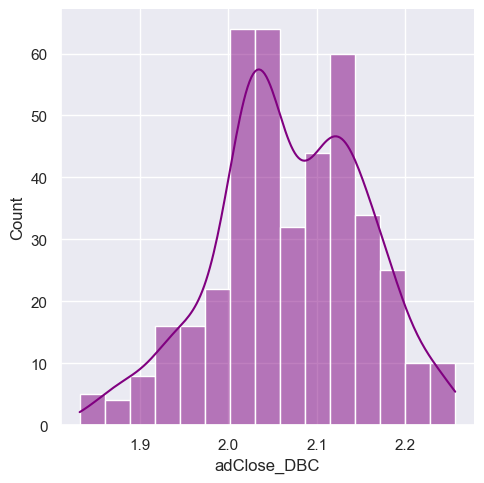

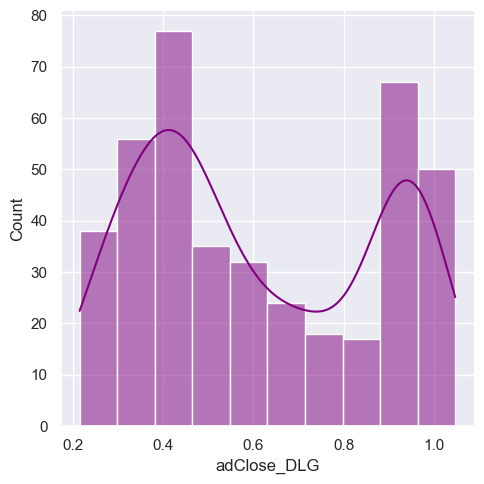

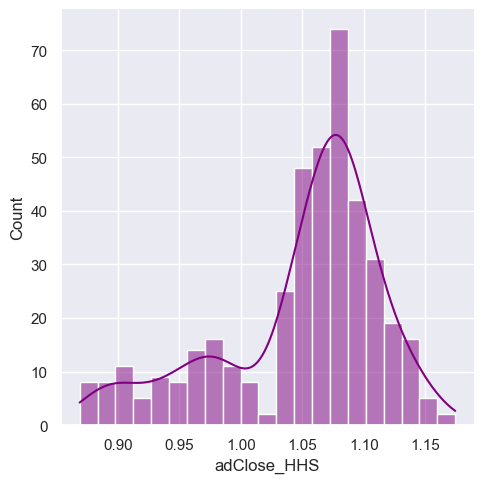

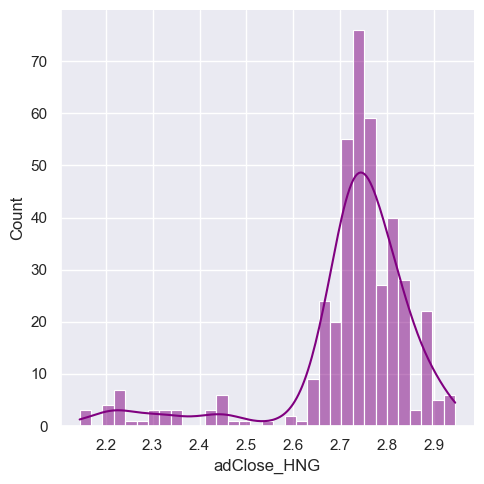

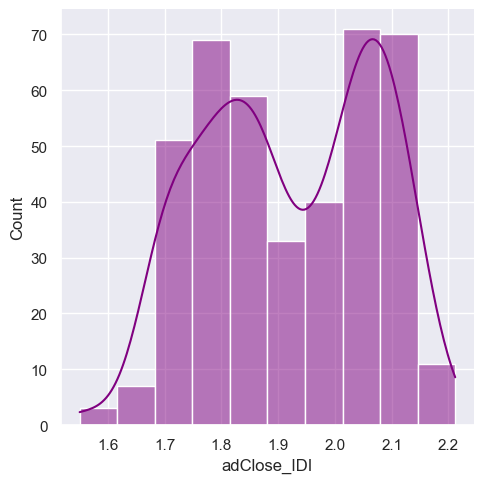

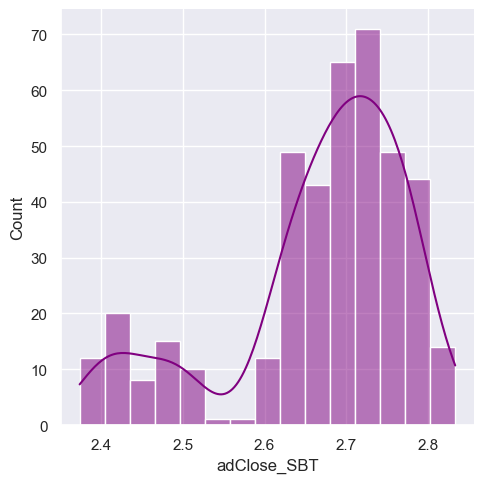

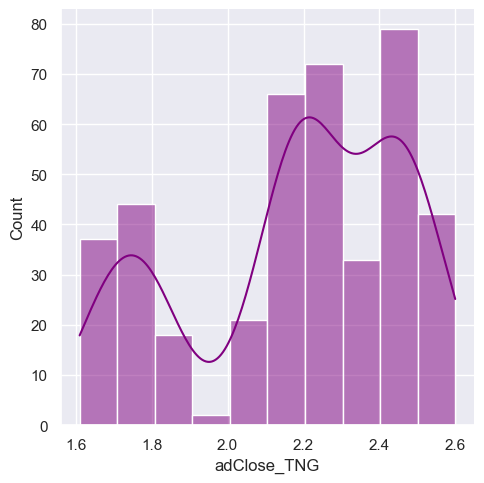

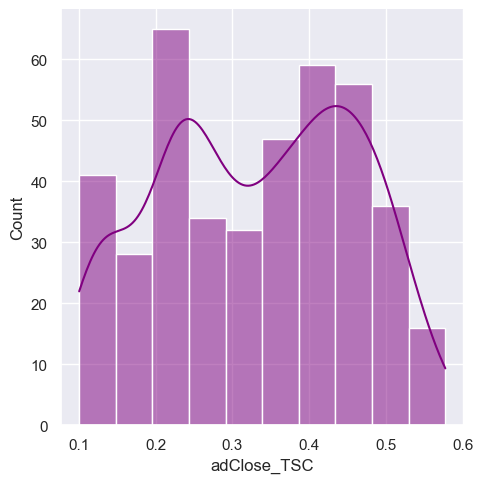

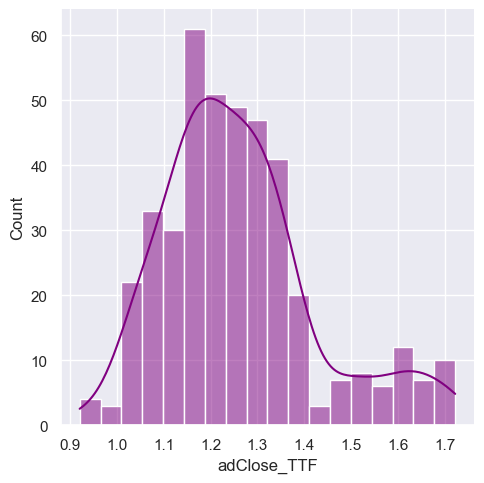

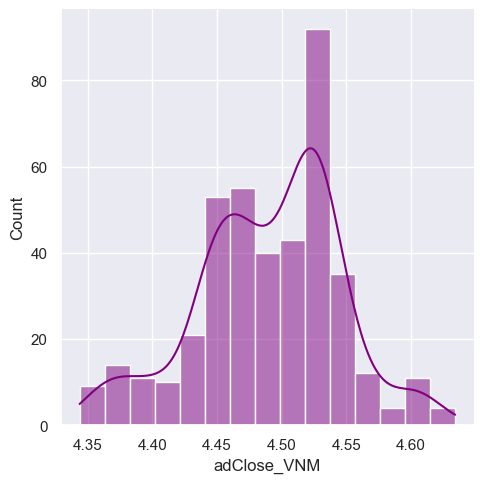

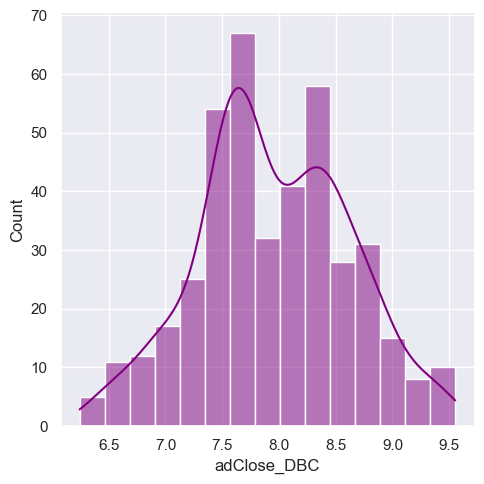

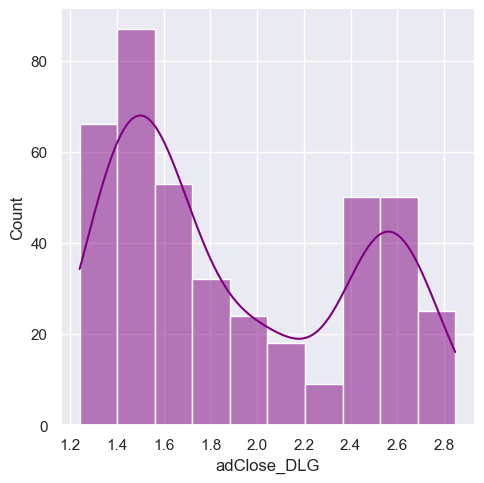

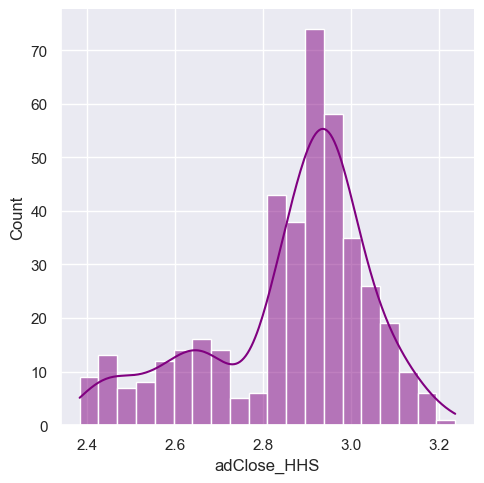

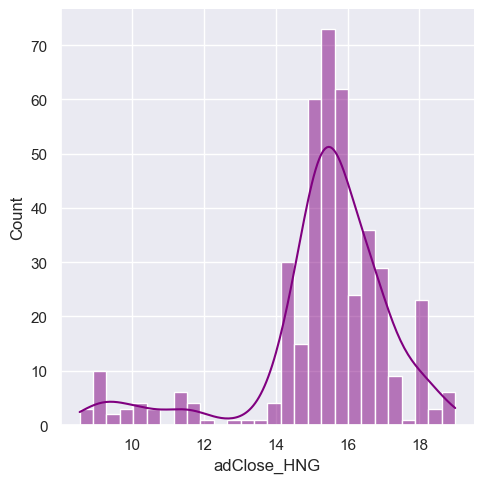

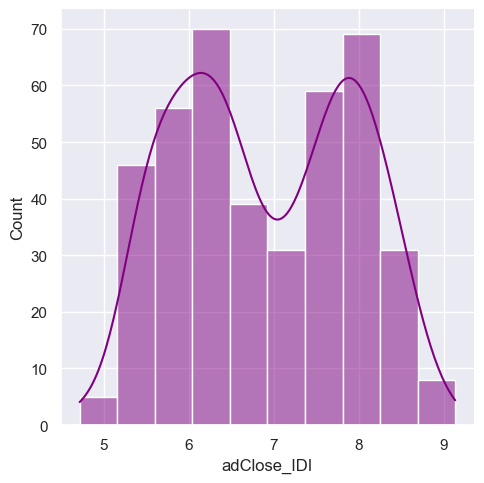

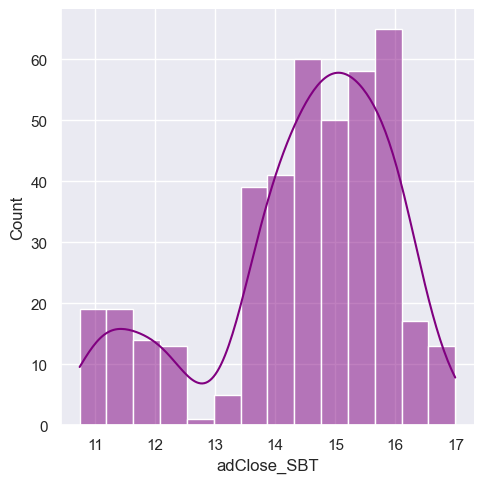

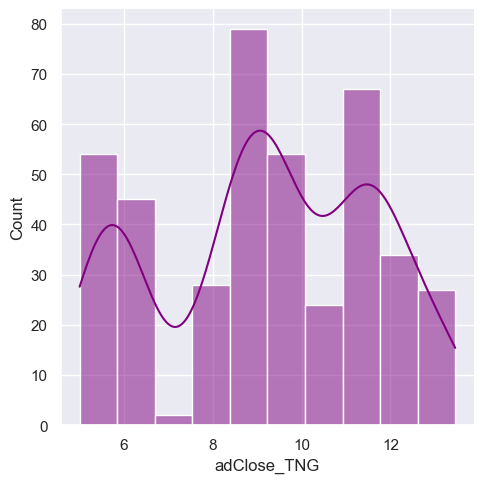

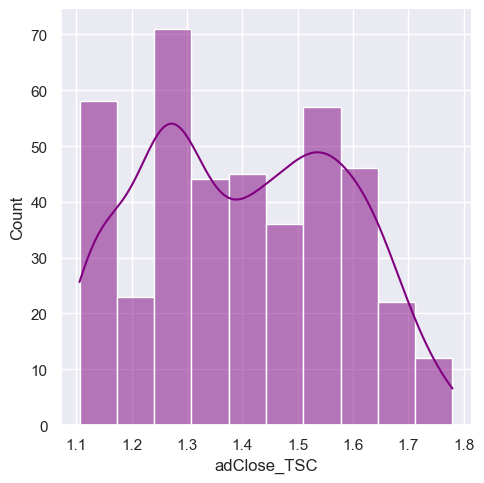

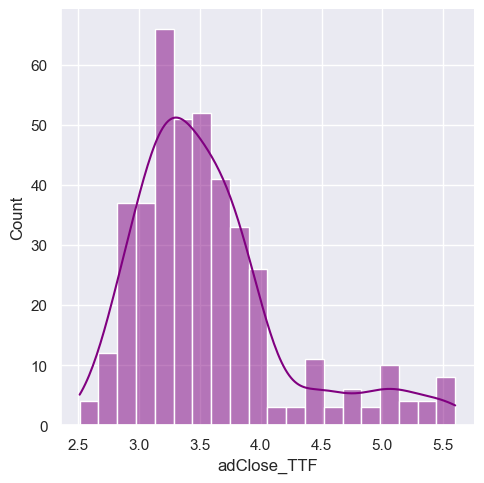

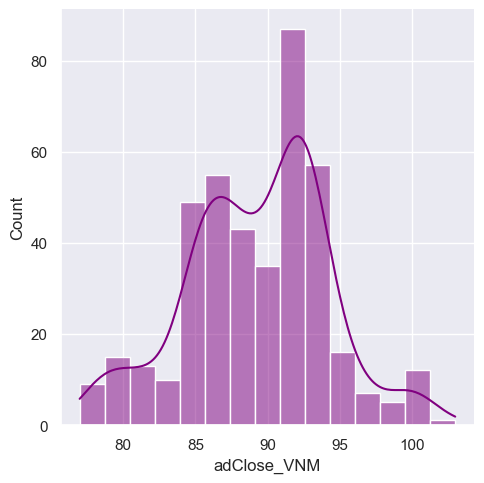

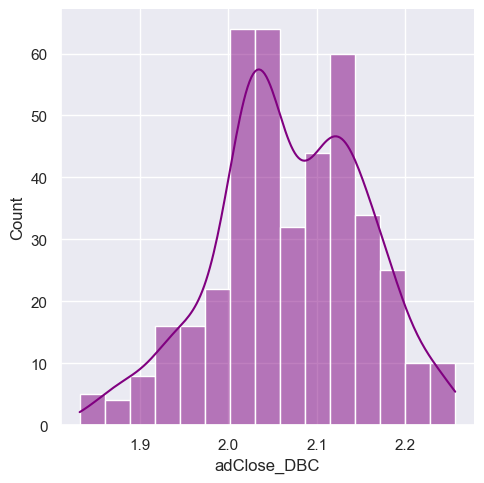

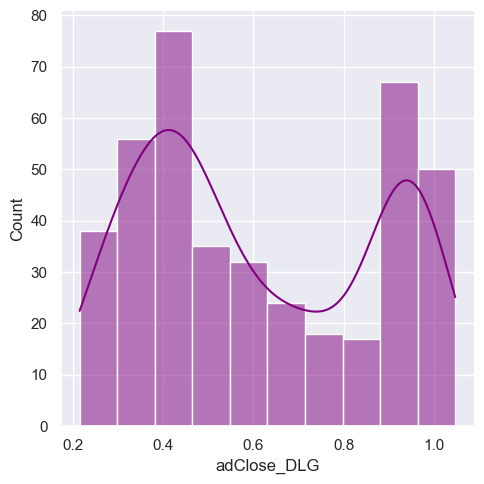

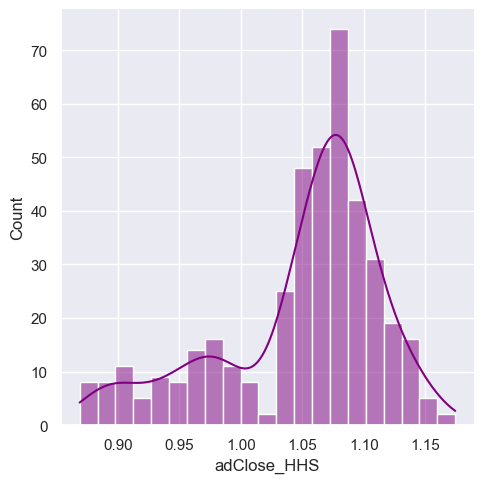

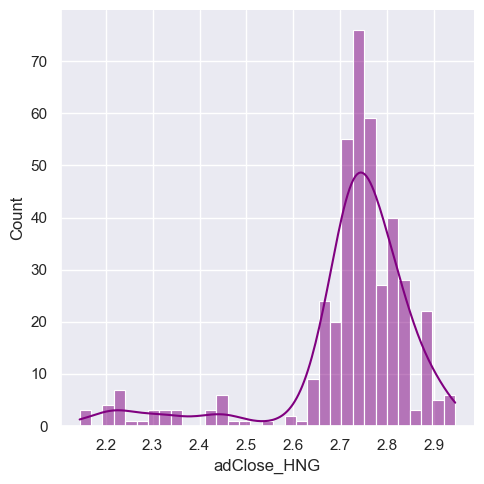

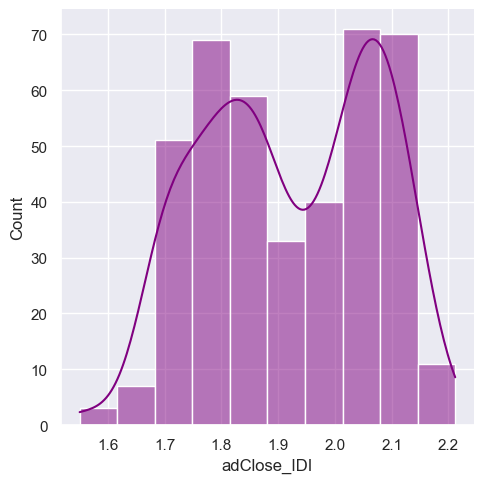

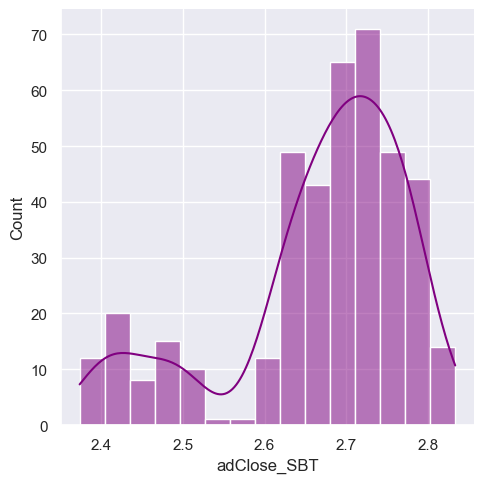

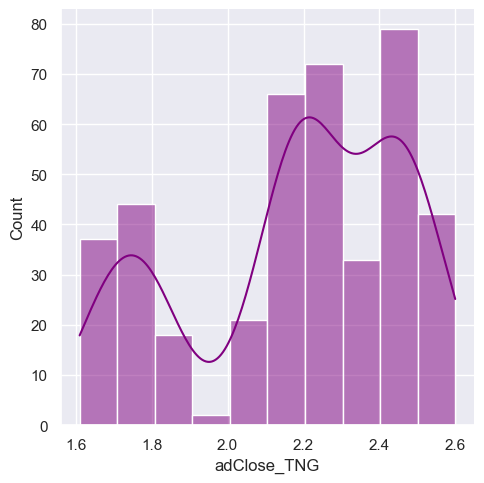

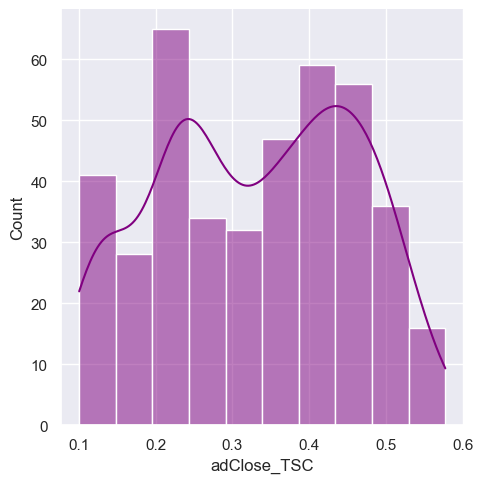

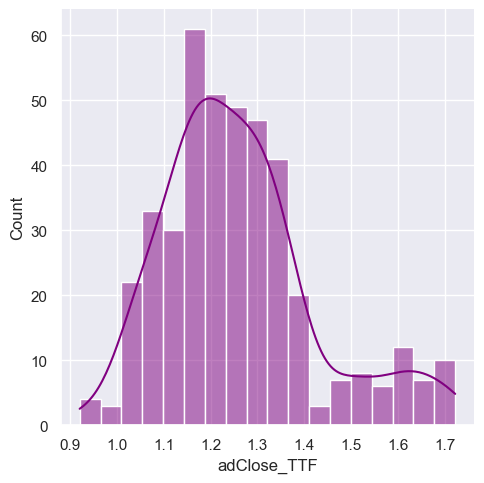

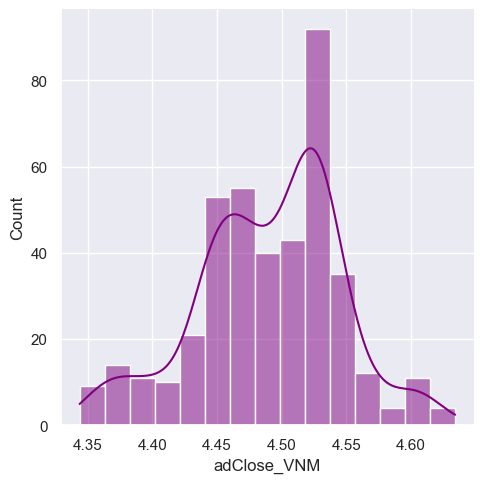

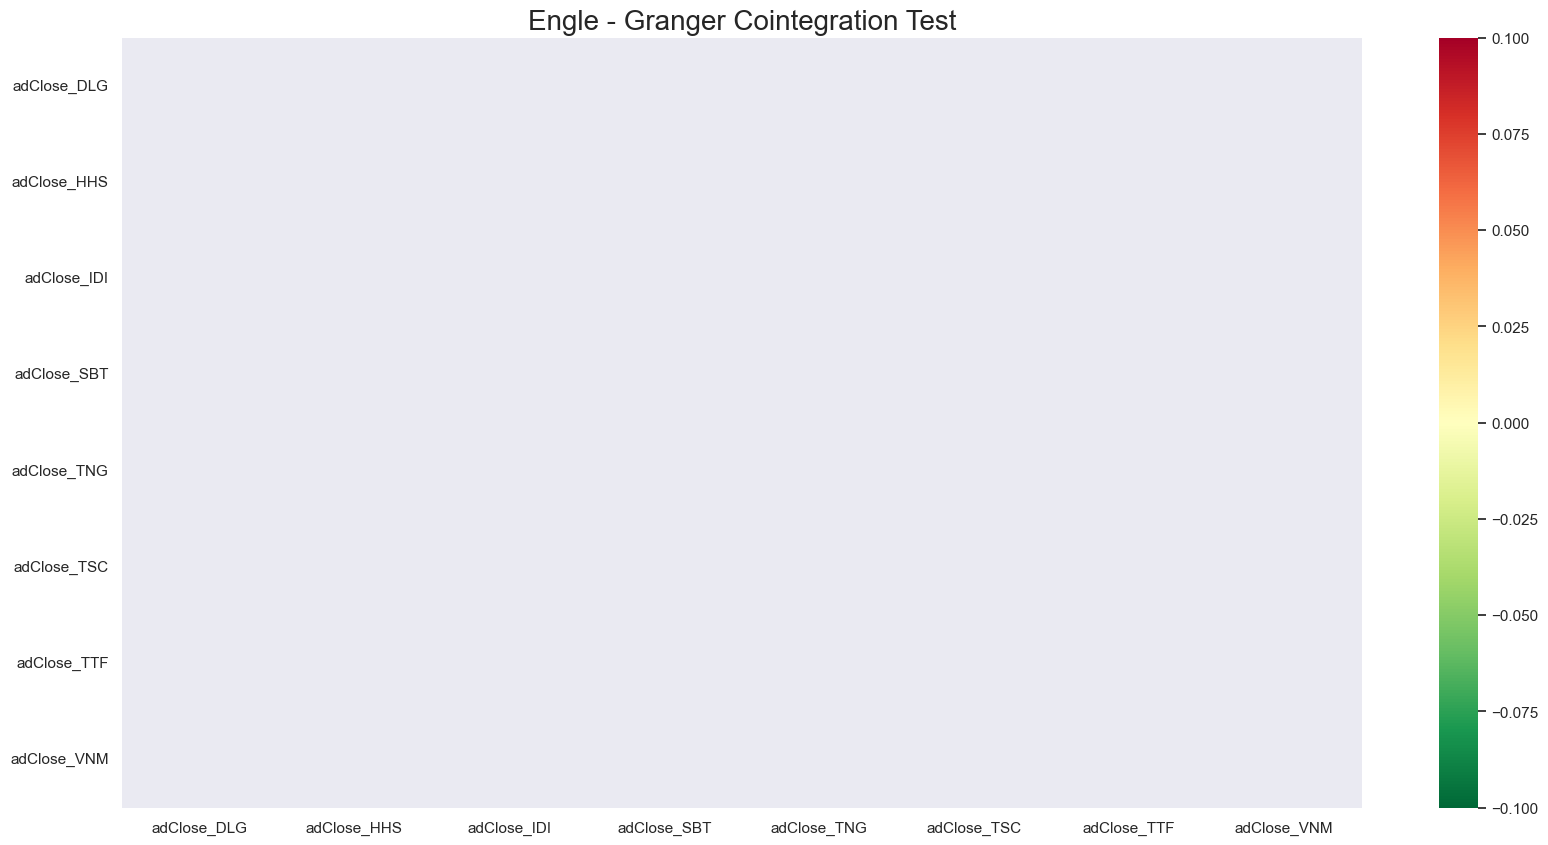

In [53]:
score_matrix, pvalue_matrix, eg_pairs = eg_coint.find_cointegrated_pairs(df_train_transformed)

In [54]:
eg_pairs 

[]

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:198: RuntimeWarning:

All-NaN slice encountered

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:203: RuntimeWarning:

All-NaN slice encountered



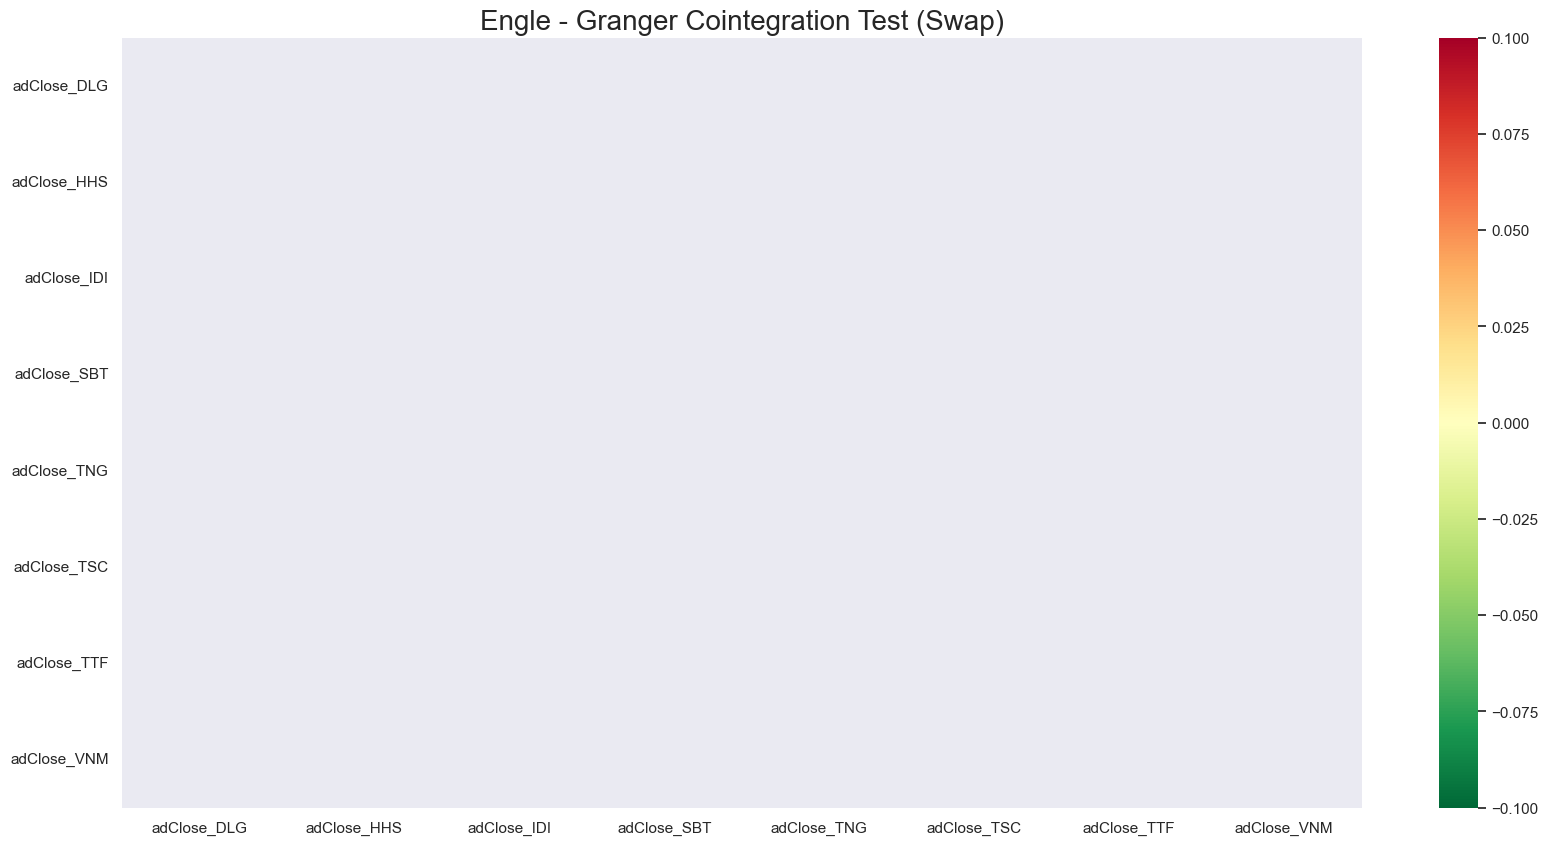

In [55]:
scores_swap, pvalues_swap, eg_pairs_swap = eg_coint.find_cointegrated_pairs_swap(df_train_transformed)

In [56]:
eg_pairs_swap

[]

## **Johansen Method**

In [57]:
johansen_pairs = jj_coint.johansen_test(df_train_transformed)

In [58]:
johansen_pairs

[['adClose_TSC', 'adClose_VNM'], ['adClose_TTF', 'adClose_VNM']]

# **Result Summary**

In [59]:
df_pairs_formation_train = hdf.pairs_formation_result_summary(
    gatev_pairs,
    eg_pairs,
    eg_pairs_swap,
    johansen_pairs
)

In [60]:
df_pairs_formation_train

,Stock A,Stock B,Gatev Pairs,Johansen Pairs,Count
0,adClose_DBC,adClose_SBT,x,,1
1,adClose_DLG,adClose_TSC,x,,1
2,adClose_HHS,adClose_IDI,x,,1
3,adClose_HHS,adClose_TTF,x,,1
4,adClose_HHS,adClose_VNM,x,,1
5,adClose_IDI,adClose_TSC,x,,1
6,adClose_IDI,adClose_TTF,x,,1
7,adClose_IDI,adClose_VNM,x,,1
8,adClose_TSC,adClose_VNM,x,x,2
9,adClose_TTF,adClose_VNM,x,x,2


In [61]:
df_pairs_formation_train.to_csv(
    f"..//..//..//..//..//results//pairs_formation//consumer_good//consumer_good_pairs_formation_first_period_{hdt.today_date_to_digits()}.csv"
    )